## Step 1 - Install FAIIS Library

In [1]:
!pip install faiss-cpu

zsh:1: command not found: pip


## Step 2 - Import Libraries

In [2]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

## Step 3 - Create a Dummy Dataset

In [3]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype("float32")  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype="float32")  # query point

## Step 4 - Build Exact NN Model

In [4]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)  # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start


## Step 5 - Build FAIIS Model

In [5]:
# Compute FAISS
nlist = 10  # n-cluster (inverted list)
m = 2  # number of subvector
quantizer = faiss.IndexFlatL2(2)  # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start


WARNING clustering 1000 points to 256 centroids: please provide at least 9984 training points
WARNING clustering 1000 points to 256 centroids: please provide at least 9984 training points


## Step 6 - Compare The Performance

In [6]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.04456901550292969
Waktu IVF+PQ: 0.0008919239044189453


## Step 7 - Visualize

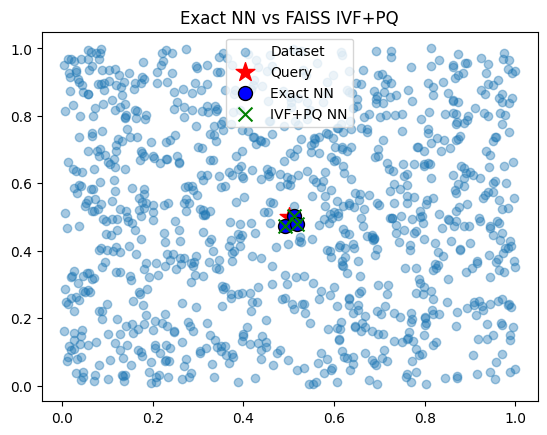

In [7]:
# Visualize
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label="Dataset")
plt.scatter(query[:, 0], query[:, 1], c="red", marker="*", s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(
    X[I_flat[0], 0], X[I_flat[0], 1], c="blue", s=100, edgecolor="k", label="Exact NN"
)

# IVF+PQ NN -> FAISS
plt.scatter(
    X[I_ivfpq[0], 0], X[I_ivfpq[0], 1], c="green", marker="x", s=100, label="IVF+PQ NN"
)

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()